**Authors:**
- Carolina López De La Madriz (100475095)
- Álvaro Martín Ruiz (100475318)
- Jaime Salafranca Pardo (100475216)
- Emma Rodríguez Hervás (100475XXX)

**Course:** Machine Learning Application

---

## Overview

This project aims to apply the techniques and methodologies learned throughout the course *Machine Learning Applications* to address a relevant and socially impactful task: **detecting fake news in text documents**. The primary goal is to develop a system capable of distinguishing between real and fake news articles by considering Natual Language Processing (NLP), text vectorization techniques, and machine learning models.

The project consists of the following tasks:

• Task 1. Natural Language Processing and text vectorization

• Task 2. Machine Learning:

– Task 2.1. Classification, Regression using feature extraction or selection techniques

– Task 2.2. Clustering using feature extraction or selection techniques

– Task 2.3. Recommendation Systems

• Task 3. Implementation of a dashboard using the Python Dash library.

• Task 4. Final report and presentation.

For the execution of the final project, students must choose to implement
any of the sub-Tasks 2 (either 2.1, 2.2 or 2.3), depending on their preferences
and the possibilities of the database used.


In [ ]:
!pip install gensim
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade --force-reinstall numpy pandas scikit-learn matplotlib seaborn gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.2 MB/s eta 0:00:00
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 8.3 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.3 MB/s eta 0:00:00
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import ast
tqdm.pandas()

# Natural Text Processing
import spacy
from bs4 import BeautifulSoup
import re
import nltk

def check_nltk_packages():
  packages = ['punkt','stopwords','omw-1.4','wordnet']

  for package in packages:
    try:
      nltk.data.find('tokenizers/' + package)
    except LookupError:
      nltk.download(package)
check_nltk_packages()


try:
  import contractions
except ModuleNotFoundError:
  !pip install contractions
  import contractions



from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis
import pyLDAvis.gensim_models



# Classification tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

seed = 10

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## DATASET

In [ ]:
df_false = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')
df = pd.read_csv('fake_or_real_news.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Fake.csv'

In [ ]:
print(df_false.shape)
print(df_true.shape)
print(df.shape)

(23481, 4)
(21417, 4)
(6335, 4)


In [ ]:
df_false['target'] = 1
df_true['target'] = 0
print(df_false['subject'].unique())
print(df_true['subject'].unique())
df_false.head()

df_total = pd.concat([df_false, df_true], ignore_index=True).drop(columns=['date','subject'])
df_total = df_total.sample(frac=1, random_state=seed).reset_index(drop=True)
df_total.head()

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']
['politicsNews' 'worldnews']


,title,text,target
0,WATCH: Republicans Disrespectfully Shout Down...,Democrats stood up for the American people but...,1
1,Saudi Arabia says U.N. report on Yemen 'inaccu...,UNITED NATIONS (Reuters) - Saudi Arabia on Fri...,0
2,Watch Morning Joe’s Mika DESTROY Paul Ryan Fo...,Republican House Speaker Paul Ryan has been ge...,1
3,House Democrats mull Pelosi leadership future,WASHINGTON (Reuters) - U.S. House Democratic L...,0
4,BREAKING: MI Court Of Appeals Orders Vote Reco...,The Michigan Court of Appeals rejected Green P...,1


### PREPROCESSING AND EDA

In [ ]:
df_total['text_length'] = df_total['text'].apply(len)
df_total['title_length'] = df_total['title'].apply(len)
df_total['word_count'] = df_total['text'].apply(lambda x: len(x.split()))
df_total['word_count_title'] = df_total['title'].apply(lambda x: len(x.split()))

In [ ]:
print(" The amount of NAN in the dataset is ", df_total.isna().sum().sum())

 The amount of NAN in the dataset is  0


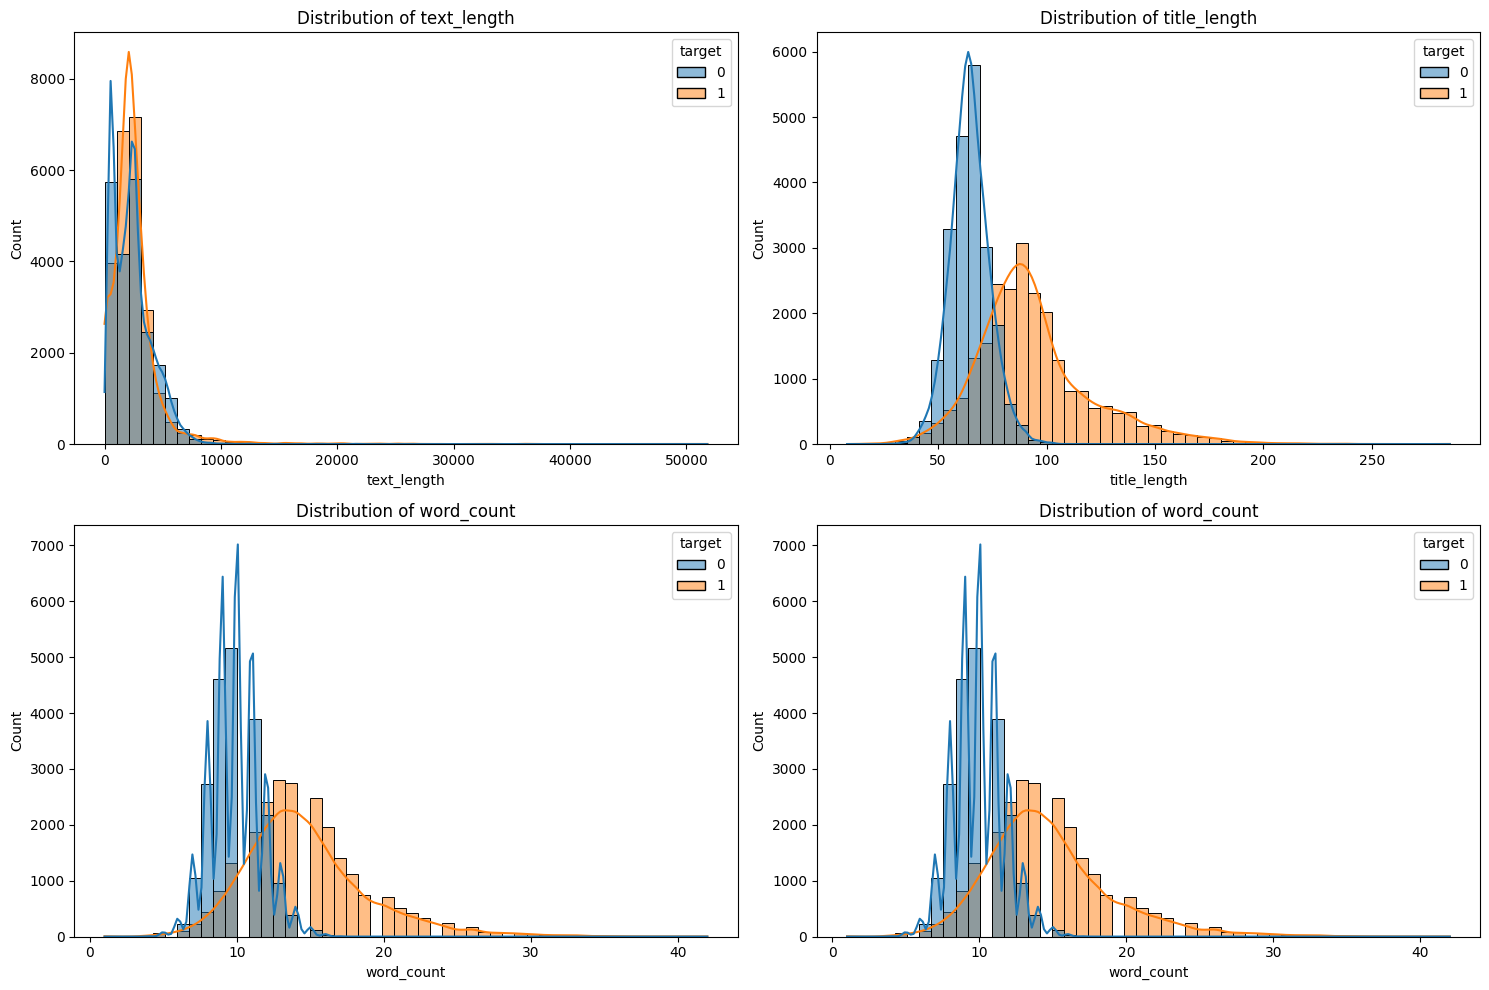

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid

columns = ['text_length', 'title_length', 'word_count', 'word_count']

for ax, col in zip(axes.flat, columns):
    sns.histplot(df_total, x=col, hue='target', bins=50, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

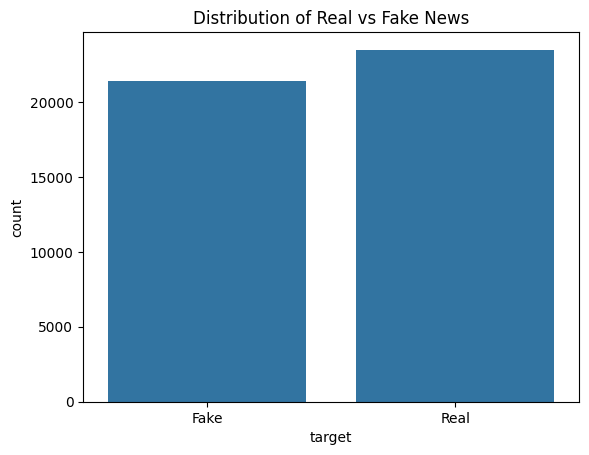

In [ ]:
sns.countplot(data=df_total, x='target')
plt.title("Distribution of Real vs Fake News")
plt.xticks(ticks=[0, 1], labels=["Fake", "Real"])
plt.show()

# Text Processing and Vectorization

## Text processing pipeline
The first task involves preparing and transforming raw news articles into a format suitable for machine learning models. We will implement a complete text preprocessing pipeline, including:
- Tokenization
- Lowercasing
- Removal of stopwords
- Lemmatization or stemming
- Removal of punctuation, special characters, and possibly named entities

For this task, we will use libraries such as SpaCy, NLTK, and scikit-learn to automate and optimize preprocessing.



In [ ]:
nlp = spacy.load("en_core_web_sm")
wnl = WordNetLemmatizer()
broken_contractions = {
    r"\bdon t\b": "don't",
    r"\bwon t\b": "won't",
    r"\bcan t\b": "can't",
    r"\bi m\b": "I'm",
    r"\byou re\b": "you're",
    r"\bhe s\b": "he's",
    r"\bshe s\b": "she's",
    r"\bit s\b": "it's",
    r"\bwe re\b": "we're",
    r"\bthey re\b": "they're",
    r"\bthat s\b": "that's",
    r"\bthere s\b": "there's",
    r"\bwhat s\b": "what's"
}

In [ ]:
def text_preprocessing_pipeline(text):

    text = BeautifulSoup(text, 'lxml').get_text()
    for pattern, replacement in broken_contractions.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)


    text = contractions.fix(text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)

    doc = nlp(text)

    tokens = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and token.lemma_.isalpha()
    ]

    tokens = [wnl.lemmatize(token) for token in tokens if token.isalnum()]

    return tokens

In [ ]:
df_total['text'][0]

'Democrats stood up for the American people but Republicans shouted them down and voted to strip health care from millions.Senate Republicans voted to repeal the Affordable Care Act, also known as Obamacare, in the middle of the night early Thursday morning.Even though Republicans don t have any plan to replace it with, they used budget reconciliation rules to prevent Democrats from blocking the vote and took the first step toward ending critical patient and consumer protections Americans have been enjoying for a few years since the Affordable Care Act went into effect, including protections for women, young people, and people with pre-existing conditions.During the roll call vote, Democrats stood up one by one when called to voice their strenuous objections, only to be shouted down by Republicans.Senator Elizabeth Warren can be heard trying to deliver an emotional defense of the landmark healthcare law, but Republicans disrespected her and others by repeatedly declaring them to be out

In [ ]:
" ".join(text_preprocessing_pipeline(df_total['text'][0]))

'democrat stand american people republican shout vote strip health care million senate republican vote repeal affordable care act know obamacare middle night early thursday morning republican plan replace budget reconciliation rule prevent democrat block vote take step end critical patient consumer protection american enjoy year affordable care act go effect include protection woman young people people pre existing condition roll vote democrat stand call voice strenuous objection shout republican senator elizabeth warren hear try deliver emotional defense landmark healthcare law republican disrespect repeatedly declare order republican go pas budget resolution simple majority vote cowardly way possible order american dark s video twitter al franken elizabeth warren parade democrat drown defend obamacare dan diamond january donald trump get elect republican repeal affordable care act priority trump claim prefer replacement ready happen million american suffer heartless action partisan h

In [ ]:
df_total['text_tokens'] = df_total['text'].progress_apply(text_preprocessing_pipeline)
df_total['title_tokens'] = df_total['title'].progress_apply(text_preprocessing_pipeline)

  0%|          | 0/44898 [00:00<?, ?it/s]

<ipython-input-10-033572685101>:3: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, 'lxml').get_text()


  0%|          | 0/44898 [00:00<?, ?it/s]

<ipython-input-10-033572685101>:3: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, 'lxml').get_text()


Average number of tokens per title: 8.85
Average number of tokens per news: 213.51


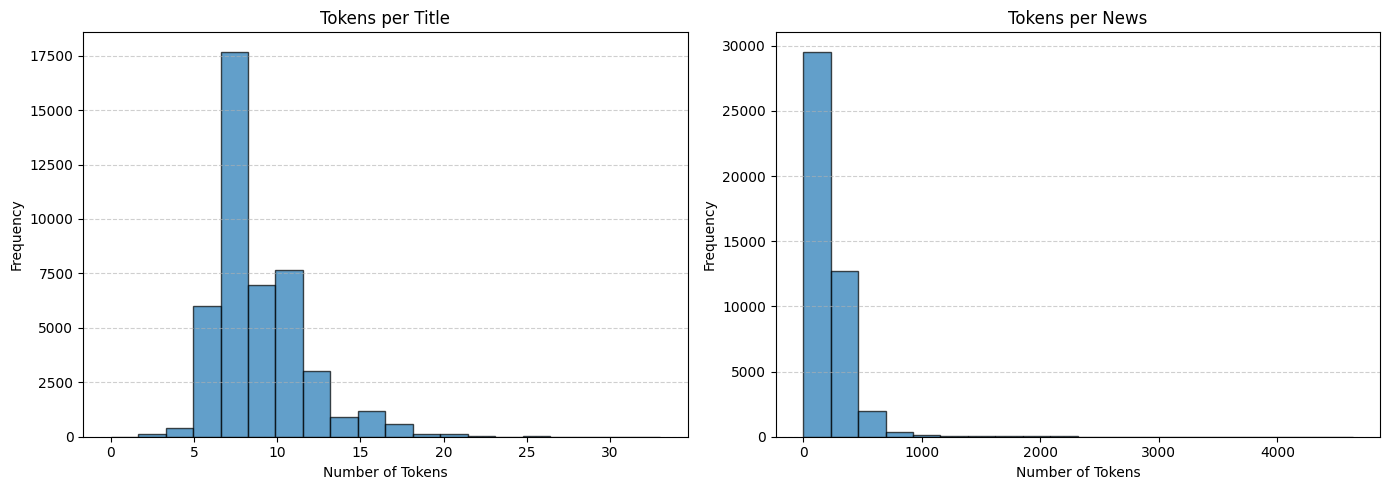

In [ ]:
corpus_title = df_total['title_tokens']
num_tokens_per_title = [len(a) for a in corpus_title]
corpus = df_total['text_tokens']
num_tokens_per_review = [len(a) for a in corpus]
average_tokens_title = np.mean(num_tokens_per_title)
print(f"Average number of tokens per title: {average_tokens_title:.2f}")
average_tokens = np.mean(num_tokens_per_review)
print(f"Average number of tokens per news: {average_tokens:.2f}")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(num_tokens_per_title, bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title("Tokens per Title")
axes[0].set_xlabel("Number of Tokens")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

axes[1].hist(num_tokens_per_review, bins=20, edgecolor='black', alpha=0.7)
axes[1].set_title("Tokens per News")
axes[1].set_xlabel("Number of Tokens")
axes[1].set_ylabel("Frequency")
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
df_total.to_csv('df_total.csv', index=False)

NameError: name 'df_total' is not defined

In [ ]:
df_total = pd.read_csv('df_total.csv')
df_total['title_tokens'] = df_total['title_tokens'].apply(ast.literal_eval)
df_total['text_tokens'] = df_total['text_tokens'].apply(ast.literal_eval)

ParserError: Error tokenizing data. C error: EOF inside string starting at row 3474

In [ ]:
# ALVARO
from google.colab import drive
drive.mount('/content/drive')

# Adjust the path to match where your file is in Drive
file_path = '/content/drive/MyDrive/df_total.csv'

import pandas as pd
df_total = pd.read_csv(file_path)

df_total['title_tokens'] = df_total['title_tokens'].apply(ast.literal_eval)
df_total['text_tokens'] = df_total['text_tokens'].apply(ast.literal_eval)

Mounted at /content/drive


In [ ]:
df_total.head()

,title,text,target,text_length,title_length,word_count,text_tokens,title_tokens,word_count_title
0,WATCH: Republicans Disrespectfully Shout Down...,Democrats stood up for the American people but...,1,2214,106,354,"[democrat, stand, american, people, republican...","[watch, republican, disrespectfully, shout, el...",14
1,Saudi Arabia says U.N. report on Yemen 'inaccu...,UNITED NATIONS (Reuters) - Saudi Arabia on Fri...,0,2531,66,396,"[united, nation, reuters, saudi, arabia, frida...","[saudi, arabia, say, report, yemen, inaccurate...",10
2,Watch Morning Joe’s Mika DESTROY Paul Ryan Fo...,Republican House Speaker Paul Ryan has been ge...,1,2107,86,381,"[republican, house, speaker, paul, ryan, getti...","[watch, morning, joe, mika, destroy, paul, rya...",14
3,House Democrats mull Pelosi leadership future,WASHINGTON (Reuters) - U.S. House Democratic L...,0,3778,45,618,"[washington, reuters, house, democratic, leade...","[house, democrat, mull, pelosi, leadership, fu...",6
4,BREAKING: MI Court Of Appeals Orders Vote Reco...,The Michigan Court of Appeals rejected Green P...,1,4473,119,745,"[michigan, court, appeal, reject, green, party...","[breaking, mi, court, appeal, order, vote, rec...",19


In [ ]:
from gensim.models.phrases import Phrases

phrase_model = Phrases((df_total['text_tokens']), min_count=2, threshold=20)
corpus = [el for el in phrase_model[df_total['text_tokens']]]
df_total['clean_text'] = corpus

phrase_model = Phrases(df_total['title_tokens'], min_count=2, threshold=20)
corpus = [el for el in phrase_model[df_total['title_tokens']]]
df_total['clean_title'] = corpus


Dictionary creation for title and text

In [ ]:
title_dictionary = Dictionary(df_total['clean_title'])
text_dictionary = Dictionary(df_total['clean_text'])

# Eliminar palabras poco frecuentes (con un umbral de frecuencia)
title_dictionary.filter_extremes(no_below=2, no_above=0.7)
text_dictionary.filter_extremes(no_below=2, no_above=0.7)

print("Title Dictionary:")
print(title_dictionary.token2id)

print("Text Dictionary:")
print(text_dictionary.token2id)

Title Dictionary:
{'elizabeth_warren': 0, 'late_night': 1, 'repeal_obamacare': 2, 'republican': 3, 'shout': 4, 'vote': 5, 'watch': 6, 'inaccurate': 7, 'misleading': 8, 'report': 9, 'saudi_arabia': 10, 'say': 11, 'yemen': 12, 'destroy': 13, 'endorsing': 14, 'mika': 15, 'morning_joe': 16, 'paul_ryan': 17, 'sell': 18, 'trump': 19, 'video': 20, 'democrat': 21, 'future': 22, 'house': 23, 'leadership': 24, 'mull': 25, 'pelosi': 26, 'activist': 27, 'appeal': 28, 'attorney': 29, 'breaking': 30, 'count': 31, 'court': 32, 'jill_stein': 33, 'mi': 34, 'order': 35, 'stop': 36, 'vote_recount': 37, 'live': 38, 'nation': 39, 'news': 40, 'popular': 41, 'publishes_list': 42, 'refugee': 43, 'want': 44, 'world': 45, 'broach': 46, 'human_right': 47, 'meet': 48, 'obama': 49, 'philippine_duterte': 50, 'anti': 51, 'decision': 52, 'government': 53, 'missile_system': 54, 'south_korean': 55, 'appear': 56, 'fundraiser': 57, 'hillary_clinton': 58, 'los_angeles': 59, 'street_art': 60, 'advisory_council': 61, 'propo

In [ ]:
df_total_aux = df_total.copy()
df_total = df_total.iloc[:1000]
df_total.shape

(1000, 11)

In [ ]:
corpus_def = []
for sent in df_total['clean_text']:
  aux = [token for token in sent if token in text_dictionary.token2id.keys()]
  corpus_def.append(aux)

df_total['clean_text'] = corpus_def

corpus_def = []
for sent in df_total['clean_title']:
  aux = [token for token in sent if token in text_dictionary.token2id.keys()]
  corpus_def.append(aux)

df_total['clean_title'] = corpus_def

<ipython-input-6-e7821141d34e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['clean_text'] = corpus_def


### Vectorisation

1. Bag of words vectorizatiom

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Convert the list of tokens in each row to a single string before joining
X_bow = [text_dictionary.doc2bow(text) for text in df_total['clean_text']]
X_bow_title =  [title_dictionary.doc2bow(text) for text in df_total['clean_title']]

2. TFIDF vectorization

In [ ]:
from gensim.models import TfidfModel

tfidf_model = TfidfModel(X_bow)
text_corpus_tfidf = tfidf_model[X_bow]

tfidf_model_title = TfidfModel(X_bow_title)
title_corpus_tfidf = tfidf_model_title[X_bow_title]


4. Doc2Vec Vectorization

In [ ]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

# Usar directamente los tokens preprocesados
text_documents = [TaggedDocument(words=tokens, tags=[f"text_{i}"]) for i, tokens in enumerate(df_total['clean_text'])]
title_documents = [TaggedDocument(words=tokens, tags=[f"title_{i}"]) for i, tokens in enumerate(df_total['clean_title'])]

# Entrenar modelo Doc2Vec para textos
doc2vec_model_text = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=20)
doc2vec_model_text.build_vocab(text_documents)
doc2vec_model_text.train(text_documents, total_examples=doc2vec_model_text.corpus_count, epochs=doc2vec_model_text.epochs)

# Entrenar modelo Doc2Vec para títulos
doc2vec_model_title = Doc2Vec(vector_size=50, window=3, min_count=2, workers=4, epochs=20)
doc2vec_model_title.build_vocab(title_documents)
doc2vec_model_title.train(title_documents, total_examples=doc2vec_model_title.corpus_count, epochs=doc2vec_model_title.epochs)

# Inferir vectores para cada documento
text_doc_vectors = [doc2vec_model_text.infer_vector(tokens) for tokens in df_total['clean_text']]
title_doc_vectors = [doc2vec_model_title.infer_vector(tokens) for tokens in df_total['clean_title']]

# Convertir a DataFrames para análisis o modelado
import pandas as pd
doc2vec_text_df = pd.DataFrame(text_doc_vectors).add_prefix("text_d2v_")
doc2vec_title_df = pd.DataFrame(title_doc_vectors).add_prefix("title_d2v_")

# Unir a tu dataset original si lo necesitas
#df_total = pd.concat([df_total.reset_index(drop=True), doc2vec_text_df, doc2vec_title_df], axis=1)

print("Doc2Vec vectorization completa. Nuevas columnas añadidas al DataFrame.")



Doc2Vec vectorization completa. Nuevas columnas añadidas al DataFrame.


In [ ]:
import gensim
import numpy as np
import gensim.downloader as api
from sklearn.preprocessing import normalize

glove_model = api.load("glove-wiki-gigaword-50")



def get_doc_vector(tokens):
    vectors = [glove_model[word] for word in tokens if word in glove_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(glove_model.vector_size)

# Obtener los vectores de GloVe para los títulos y textos
X_glove = np.vstack(df_total['clean_text'].progress_apply(get_doc_vector))
X_glove = normalize(X_glove)

X_glove_titles = np.vstack(df_total['clean_title'].progress_apply(get_doc_vector))
X_glove_titles = normalize(X_glove_titles)

print("GloVe Vectors for Titles:")
print(X_glove_titles)

print("GloVe Vectors for Texts:")
print(X_glove)


[==================================================] 100.0% 66.0/66.0MB downloaded


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

GloVe Vectors for Titles:
[[-0.0984306  -0.12210929  0.14841092 ... -0.04739055 -0.0193666
   0.0929658 ]
 [ 0.09428259 -0.21684613  0.07049971 ...  0.43056628  0.24770486
  -0.00795202]
 [ 0.04191677 -0.02812768  0.2252428  ... -0.02278147 -0.00981249
   0.03783484]
 ...
 [-0.1246494  -0.04404839 -0.01603226 ...  0.19592184 -0.03461692
   0.10347275]
 [ 0.21625628  0.08904993  0.11841447 ...  0.27940708 -0.27705788
   0.07054243]
 [ 0.05348916 -0.10651506 -0.10461035 ...  0.04939139 -0.02475584
   0.07015785]]
GloVe Vectors for Texts:
[[ 0.00799126 -0.00586311  0.05297413 ... -0.00623575  0.00169699
   0.09286669]
 [ 0.09855698 -0.01901957  0.06494935 ...  0.1278189   0.00729625
  -0.0243985 ]
 [-0.01441485  0.06627481  0.05582388 ...  0.04609807  0.03821268
   0.10962732]
 ...
 [ 0.03081772  0.04285739  0.04853196 ...  0.12807272  0.014954
   0.07681492]
 [ 0.10696294  0.07188512  0.03484274 ...  0.15036167 -0.08285035
  -0.0313235 ]
 [ 0.019875    0.05837696  0.00979816 ...  0.09263

lda anlysis

In [ ]:
from gensim.models import CoherenceModel, LdaModel

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                                id2word=dictionary,
                                num_topics=num_topics,
                                random_state=42,
                                passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Define range of topics
start = 4
limit = 15
step = 2


# Compute coherence for BoW
lda_models_bow, coherence_bow = compute_coherence_values(dictionary=text_dictionary,
                                                         corpus=X_bow,
                                                         start=start,
                                                         limit=limit,
                                                         step=step,
                                                         texts=df_total['clean_text'])

# Compute coherence for TF-IDF
lda_models_tfidf, coherence_tfidf = compute_coherence_values(dictionary=text_dictionary,
                                                             corpus=text_corpus_tfidf,
                                                             start=start,
                                                             limit=limit,
                                                             step=step,
                                                             texts=df_total['clean_text'])

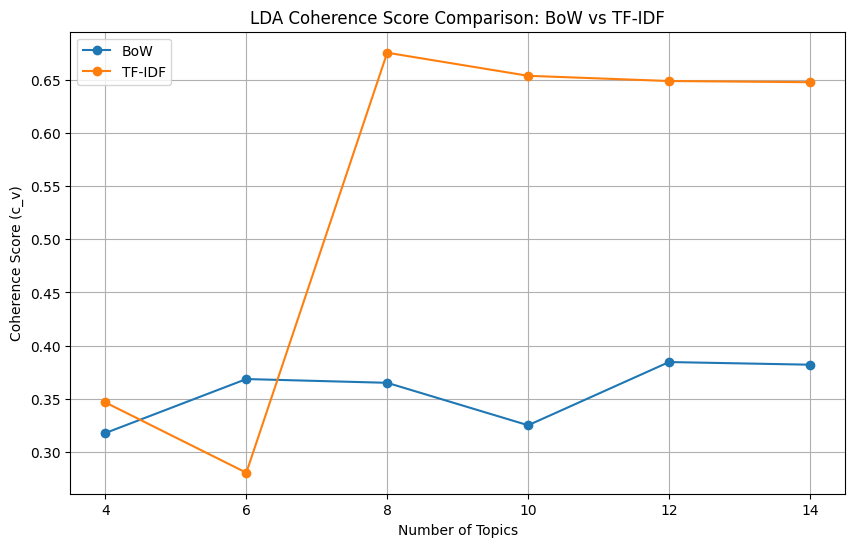

In [ ]:
x = range(start, limit, step)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_bow, label="BoW", marker='o')
plt.plot(x, coherence_tfidf, label="TF-IDF", marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.legend()
plt.title("LDA Coherence Score Comparison: BoW vs TF-IDF")
plt.grid(True)
plt.show()

In [ ]:
best_idx = coherence_tfidf.index(max(coherence_tfidf))  # or coherence_tfidf
best_model = lda_models_bow[best_idx]  # or lda_models_tfidf[best_idx]

best_model.print_topics(num_words=10)


[(0,
  '0.006*"s" + 0.004*"police" + 0.003*"state" + 0.002*"time" + 0.002*"group" + 0.002*"student" + 0.002*"take" + 0.001*"cop" + 0.001*"article" + 0.001*"officer"'),
 (1,
  '0.016*"trump" + 0.015*"s" + 0.006*"people" + 0.006*"president" + 0.005*"republican" + 0.004*"state" + 0.004*"country" + 0.004*"year" + 0.004*"donald_trump" + 0.004*"tell"'),
 (2,
  '0.013*"s" + 0.003*"people" + 0.003*"party" + 0.003*"like" + 0.003*"republican" + 0.002*"year" + 0.002*"conservative" + 0.002*"want" + 0.002*"president" + 0.002*"tell"'),
 (3,
  '0.001*"energy" + 0.001*"gun" + 0.001*"school" + 0.001*"tribe" + 0.001*"schumer" + 0.001*"pakistan" + 0.001*"williams" + 0.001*"isaac" + 0.001*"sinai" + 0.001*"company"'),
 (4,
  '0.003*"s" + 0.001*"police" + 0.001*"soros" + 0.001*"castro" + 0.001*"hollywood" + 0.001*"kill" + 0.001*"report" + 0.001*"accord" + 0.001*"prince" + 0.001*"year"'),
 (5,
  '0.002*"percent" + 0.002*"gain" + 0.002*"billion" + 0.001*"tax" + 0.001*"party" + 0.001*"italy" + 0.001*"technolog

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(best_model, text_corpus_tfidf, text_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.273120  0.008434       1        1  60.217640
2     -0.089086 -0.060592       2        1  12.805463
0     -0.016713  0.069845       3        1   7.289079
6      0.046082 -0.001178       4        1   4.722295
4      0.060342 -0.010920       5        1   4.479545
7      0.062346  0.013850       6        1   4.322276
3      0.090285 -0.008547       7        1   3.540836
5      0.119864 -0.010893       8        1   2.622866, topic_info=        Term       Freq      Total Category  logprob  loglift
91         s  97.000000  97.000000  Default  30.0000  30.0000
103    trump  82.000000  82.000000  Default  29.0000  29.0000
555  percent   9.000000   9.000000  Default  28.0000  28.0000
875   police   7.000000   7.000000  Default  27.0000  27.0000
203   report  17.000000  17.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
811    local   0.088231   4.048398   Topic8  -7.8069  -0.1852
854  foreign   0.082864   4.621196   Topic8  -7.8697  -0.3803
91         s   0.095799  97.711371   Topic8  -7.7246  -3.2866
583    state   0.086509  26.734028   Topic8  -7.8266  -2.0925
636  migrant   0.076860   2.130909   Topic8  -7.9449   0.3186

[568 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
2811      1  0.785307        abortion
324       1  0.863629          accord
324       2  0.086363          accord
1105      1  0.903771  administration
3281      1  1.166003      ambassador
...     ...       ...             ...
112       1  0.839396            year
112       2  0.079942            year
112       3  0.039971            year
1759      1  0.680863        year_old
1759      2  0.226954        year_old

[316 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 7, 5, 8, 4, 6])

In [ ]:
from gensim.matutils import corpus2dense
from sklearn.metrics.pairwise import cosine_similarity

# Assuming num_terms is the total number of terms in your dictionary
num_terms = len(text_dictionary)

# Convert X_bow to a dense NumPy array
X_bow_dense = corpus2dense(X_bow, num_terms=num_terms).T

# Convert X_bow_title to a dense NumPy array
num_terms_title = len(title_dictionary)
X_bow_title_dense = corpus2dense(X_bow_title, num_terms=num_terms_title).T

# Now you can use cosine_similarity:
similarity_bow = cosine_similarity(X_bow_dense)
similarity_bow_title = cosine_similarity(X_bow_title_dense)

num_terms_text = len(text_dictionary)
X_tfidf_dense = corpus2dense(text_corpus_tfidf, num_terms=num_terms_text).T
similarity_tfidf = cosine_similarity(X_tfidf_dense)

# Para los títulos
num_terms_title = len(title_dictionary)
X_tfidf_title_dense = corpus2dense(title_corpus_tfidf, num_terms=num_terms_title).T
similarity_tfidf_title = cosine_similarity(X_tfidf_title_dense)

## Comparison of Vectorisation techniques

In [ ]:
def average_similarity(matrix):
    n = matrix.shape[0]
    return (matrix.sum() - n) / (n * (n - 1))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_doc2vec_text = cosine_similarity(text_doc_vectors)
similarity_doc2vec_titles = cosine_similarity(title_doc_vectors)
similarity_glove_titles = cosine_similarity(X_glove_titles)
similarity_glove_texts = cosine_similarity(X_glove)


print("Cosine Similarity Matrix (BoW - Text):")
print(average_similarity(similarity_bow))

print("\nCosine Similarity Matrix (BoW - Title):")
print(average_similarity(similarity_bow_title))

print("\nCosine Similarity Matrix (TF-IDF - Text):")
print(average_similarity(similarity_tfidf))

print("\nCosine Similarity Matrix (TF-IDF - Title):")
print(average_similarity(similarity_tfidf_title))

print("\nCosine Similarity Matrix (Doc2Vec - Text):")
print(average_similarity(similarity_doc2vec_text))
print("\nCosine Similarity Matrix (Doc2Vec - Title):")
print(average_similarity(similarity_doc2vec_titles))

print("\nCosine Similarity Matrix (GloVe - Text):")
print(average_similarity(similarity_glove_texts))

print("\nCosine Similarity Matrix (GloVe - Title):")
print(average_similarity(similarity_glove_titles))


Cosine Similarity Matrix (BoW - Text):
0.08275214276776777

Cosine Similarity Matrix (BoW - Title):
0.027304362956706706

Cosine Similarity Matrix (TF-IDF - Text):
0.016953381115490492

Cosine Similarity Matrix (TF-IDF - Title):
0.004981607584146647

Cosine Similarity Matrix (Doc2Vec - Text):
0.28254369994994993

Cosine Similarity Matrix (Doc2Vec - Title):
0.9360015640640641

Cosine Similarity Matrix (GloVe - Text):
0.862156874216699

Cosine Similarity Matrix (GloVe - Title):
0.6419368496948761


In [ ]:
df_total = df_total_aux

In [ ]:
def get_doc_vector(tokens):
    vectors = [glove_model[word] for word in tokens if word in glove_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(glove_model.vector_size)

# Obtener los vectores de GloVe para los títulos y textos
X_glove = np.vstack(df_total['clean_text'].progress_apply(get_doc_vector))
X_glove = normalize(X_glove)

print("GloVe Vectors for Texts:")
print(X_glove)

  0%|          | 0/44898 [00:00<?, ?it/s]

GloVe Vectors for Texts:
[[ 0.00799126 -0.00586311  0.05297413 ... -0.00623575  0.00169699
   0.09286669]
 [ 0.09914109 -0.02033434  0.06712026 ...  0.12862684  0.00614977
  -0.02222128]
 [-0.00971081  0.06145255  0.05920604 ...  0.05002492  0.03550326
   0.10809707]
 ...
 [ 0.00464783 -0.01760152  0.07658307 ...  0.08545092 -0.00150427
   0.10985834]
 [ 0.00059154  0.05097274  0.01642723 ...  0.06795161  0.04957556
  -0.00406017]
 [ 0.01334794 -0.0030694   0.0529456  ...  0.04247991 -0.01306431
   0.06950811]]


In [19]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument


title_documents = [TaggedDocument(words=tokens, tags=[f"title_{i}"]) for i, tokens in enumerate(df_total['clean_title'])]


# Entrenar modelo Doc2Vec para títulos
doc2vec_model_title = Doc2Vec(vector_size=50, window=3, min_count=2, workers=4, epochs=20)
doc2vec_model_title.build_vocab(title_documents)
doc2vec_model_title.train(title_documents, total_examples=doc2vec_model_title.corpus_count, epochs=doc2vec_model_title.epochs)


title_doc_vectors = [doc2vec_model_title.infer_vector(tokens) for tokens in df_total['clean_title']]
doc2vec_title_df = pd.DataFrame(title_doc_vectors).add_prefix("title_d2v_")

print("Doc2Vec vectorization completa. Nuevas columnas añadidas al DataFrame.")

Doc2Vec vectorization completa. Nuevas columnas añadidas al DataFrame.


### TASK 2: Classification

1. BenchMarck using Metadat about the news

2. Iteration over title information models

3. Iteration with corpus information

4. Best model selection

1. Bench Marck using Metadata

Classification Report (Linear Regression with Macro Data):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      4261
           1       0.88      0.81      0.84      4719

    accuracy                           0.84      8980
   macro avg       0.84      0.84      0.84      8980
weighted avg       0.85      0.84      0.84      8980



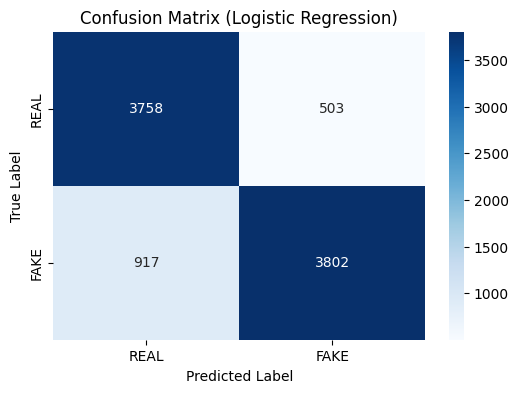

In [20]:
X = df_total[['title_length', 'word_count','text_length', 'word_count_title']]
y = df_total['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = lr_model.predict(X_test)
print("Classification Report (Linear Regression with Macro Data):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


2. Model using only the title text


Logistic Regression (Using Title):
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4261
           1       0.87      0.85      0.86      4719

    accuracy                           0.85      8980
   macro avg       0.85      0.85      0.85      8980
weighted avg       0.85      0.85      0.85      8980


Random Forest (Using Title):
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4261
           1       0.87      0.88      0.88      4719

    accuracy                           0.87      8980
   macro avg       0.87      0.87      0.87      8980
weighted avg       0.87      0.87      0.87      8980


SVM (Using Title):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4261
           1       0.90      0.88      0.89      4719

    accuracy                           0.89      8980
   macro avg       0.89      0.89      0.8

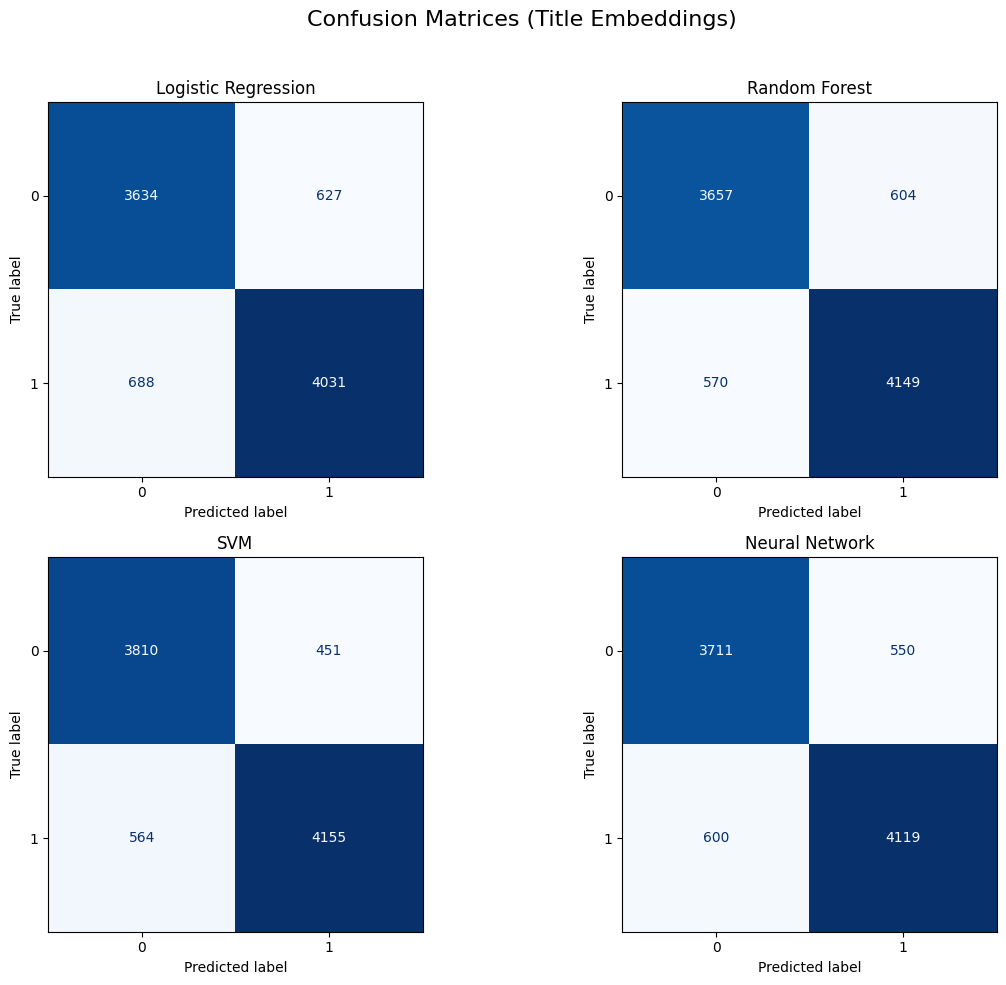

In [ ]:
X_title = title_doc_vectors

X_train, X_test, y_train, y_test = train_test_split(X_title, y, test_size=0.2, random_state=42)

# Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Crear subplots (2 filas x 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Aplanar para indexar fácilmente

# Entrenar y graficar
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} (Using Title):")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)

plt.suptitle("Confusion Matrices (Title Embeddings)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Deja espacio para el título principal
plt.show()


3. Model using the text data


Logistic Regression (Using Text):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4261
           1       0.90      0.89      0.90      4719

    accuracy                           0.89      8980
   macro avg       0.89      0.89      0.89      8980
weighted avg       0.89      0.89      0.89      8980


Random Forest (Using Text):
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4261
           1       0.92      0.94      0.93      4719

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980


SVM (Using Text):
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4261
           1       0.92      0.91      0.91      4719

    accuracy                           0.91      8980
   macro avg       0.91      0.91      0.91  

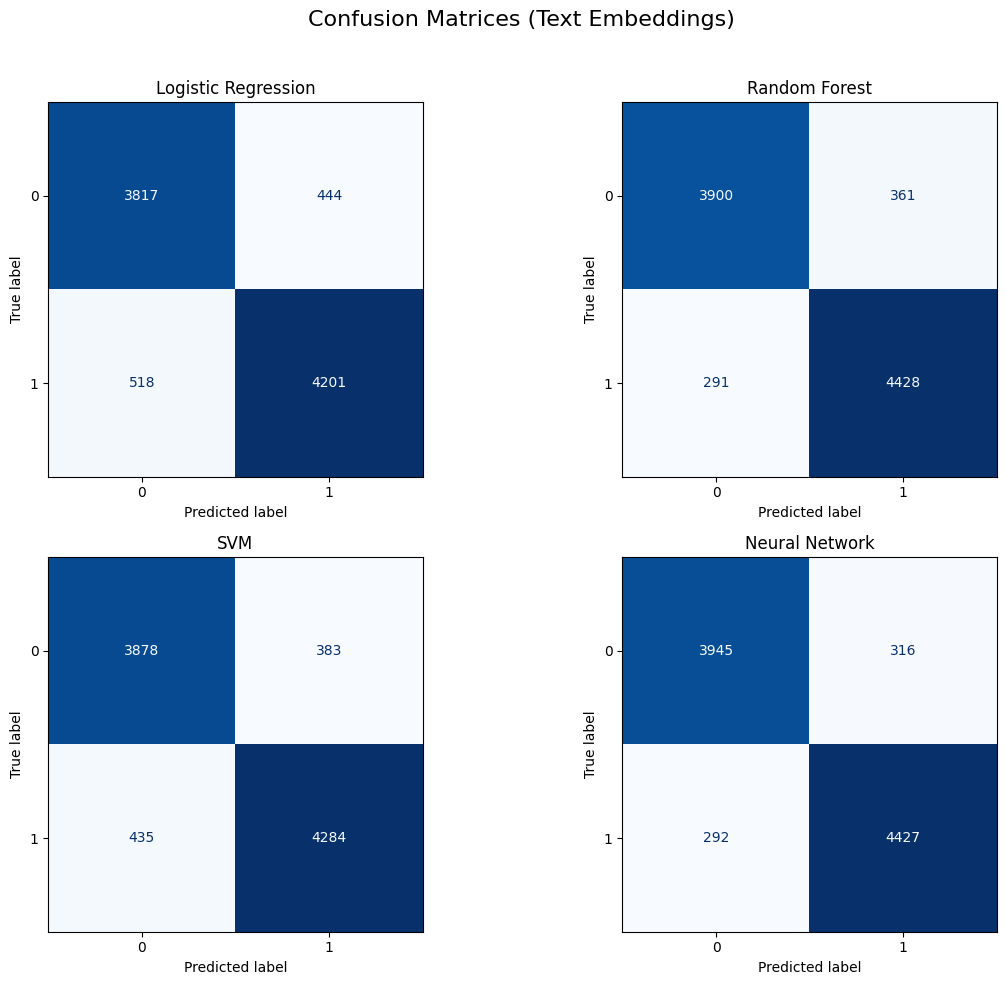

In [ ]:
X_title = X_glove

X_train, X_test, y_train, y_test = train_test_split(X_title, y, test_size=0.2, random_state=42)

# Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Crear subplots (2 filas x 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Aplanar para indexar fácilmente

# Entrenar y graficar
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} (Using Text):")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)

plt.suptitle("Confusion Matrices (Text Embeddings)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Deja espacio para el título principal
plt.show()

4. Best model overall

## 5. DASHBOARD

In [ ]:
# BASIC CLUSTERING MODEL FOR TESTING THE DASHBOARD

**DASHBOARD**

In [ ]:
# !pip install dash
# !pip install dash_bootstrap_components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 12.8 MB/s eta 0:00:00


In [26]:
'''
def text_preprocessing_pipeline(text):

    text = BeautifulSoup(text, 'lxml').get_text()
    for pattern, replacement in broken_contractions.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)


    text = contractions.fix(text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)

    doc = nlp(text)

    tokens = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and token.lemma_.isalpha()
    ]

    tokens = [wnl.lemmatize(token) for token in tokens if token.isalnum()]

    return tokens



# ──────────────────────────────────────────────────────────
# 1.  BASELINE MODEL TRAINING
# ──────────────────────────────────────────────────────────

# 1A) Baseline classifier on full GloVe vectors
y = df_total["target"].values
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_glove, y)

# 1B) Baseline clustering (KMeans)
N_CLUSTERS = 8
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
kmeans.fit(X_glove)
df_total["cluster"] = kmeans.labels_
cluster_names = [f"Cluster {i}" for i in range(N_CLUSTERS)]

# 1C) Baseline topic model (LDA on BoW)
corpus_bow = [text_dictionary.doc2bow(doc) for doc in df_total["clean_text"]]
N_TOPICS = 8
lda_model = LdaModel(
    corpus=corpus_bow,
    id2word=text_dictionary,
    num_topics=N_TOPICS,
    passes=5,
    random_state=42
)
topic_names = [f"Topic {i}" for i in range(N_TOPICS)]

'''

In [23]:
# dashboard_app.py
# ----------------------------------------------------------
# Dash dashboard for Fake-News project with clustering
# ----------------------------------------------------------
#!pip install dash
#!pip install dash_bootstrap_components
import pickle
import numpy as np
import pandas as pd
from pathlib import Path

import dash
from dash import html, dcc, Input, Output, State, dash_table
import dash_bootstrap_components as dbc

from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity



  Using cached dash-3.0.4-py3-none-any.whl.metadata (10 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
Using cached dash-3.0.4-py3-none-any.whl (7.9 MB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 4.8 MB/s eta 0:00:00


In [24]:
# ──────────────────────────────────────────────────────────
# 0-A.   Re-define your full text_preprocessing_pipeline + its globals
# ──────────────────────────────────────────────────────────
from bs4 import BeautifulSoup
import re
import contractions
import spacy
from nltk.stem import WordNetLemmatizer

nlp = spacy.load("en_core_web_sm")
wnl = WordNetLemmatizer()

broken_contractions = {
    r"\bdon t\b": "don't",
    r"\bwon t\b": "won't",
    r"\bcan t\b": "can't",
    r"\bi m\b": "I'm",
    r"\byou re\b": "you're",
    r"\bhe s\b": "he's",
    r"\bshe s\b": "she's",
    r"\bit s\b": "it's",
    r"\bwe re\b": "we're",
    r"\bthey re\b": "they're",
    r"\bthat s\b": "that's",
    r"\bthere s\b": "there's",
    r"\bwhat s\b": "what's"
}

def text_preprocessing_pipeline(text: str):
    text = BeautifulSoup(text, 'lxml').get_text()
    for pattern, replacement in broken_contractions.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)

    text = contractions.fix(text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)

    doc = nlp(text)
    tokens = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and token.lemma_.isalpha()
    ]
    return [wnl.lemmatize(t) for t in tokens if t.isalnum()]


In [28]:
import pickle, os
import numpy as np

ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# Save DataFrame
df_total.to_pickle(f"{ARTIFACT_DIR}/df_total.pkl")

# Save GloVe embeddings
np.save(f"{ARTIFACT_DIR}/X_glove.npy", X_glove)

# Save best classifier
# Baseline classifier on full GloVe vectors
y = df_total["target"].values
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_glove, y)
best_text_clf= clf
with open(f"{ARTIFACT_DIR}/best_text_mlp.pkl", "wb") as f:
    pickle.dump(best_text_clf, f)

# Save LDA model
lda_model = best_model   # best_model came from your coherence loop

with open(f"{ARTIFACT_DIR}/lda_best_gensim.pkl", "wb") as f:
    pickle.dump(lda_model, f)

# Save dictionary
with open(f"{ARTIFACT_DIR}/text_dictionary.pkl", "wb") as f:
    pickle.dump(text_dictionary, f)

# Save GloVe model
with open(f"{ARTIFACT_DIR}/glove_model.pkl", "wb") as f:
    pickle.dump(glove_model, f)


# Save preprocessing function
with open(f"{ARTIFACT_DIR}/preproc_fn.pkl", "wb") as f:
    pickle.dump(text_preprocessing_pipeline, f)


In [29]:
# ──────────────────────────────────────────────────────────
# 0.  LOAD PRE-TRAINED OBJECTS / DATA
# ──────────────────────────────────────────────────────────
# If running in the same session, import directly; otherwise uncomment load_artifact lines:
ARTIFACT_DIR = Path("artifacts")

def load_artifact(name):
    path = ARTIFACT_DIR / name
    if name.endswith(".npy"):
        return np.load(path)
    else:
        return pickle.load(open(path, "rb"))


df_total                      = load_artifact("df_total.pkl")
X_glove                       = load_artifact("X_glove.npy")
best_text_clf                 = load_artifact("best_text_mlp.pkl")
lda_model                     = load_artifact("lda_best_gensim.pkl")
text_dictionary               = load_artifact("text_dictionary.pkl")
glove_model                   = load_artifact("glove_model.pkl")
text_preprocessing_pipeline   = load_artifact("preproc_fn.pkl")



In [31]:
def topic_distribution(tokens) -> np.ndarray:
    bow   = text_dictionary.doc2bow(tokens)
    dist  = np.zeros(N_TOPICS)
    for idx, prob in lda_model.get_document_topics(bow):
        dist[idx] = prob
    return dist

In [32]:
df_total["topic_id"] = df_total["title_tokens"].apply(
    lambda toks: int(np.argmax(topic_distribution(toks)))
)

In [41]:
# ──────────────────────────────────────────────────────────
# 1.  CLUSTERING SETUP (baseline KMeans)
# ──────────────────────────────────────────────────────────
from sklearn.cluster import KMeans

# number of topics & clusters
N_TOPICS    = lda_model.num_topics
topic_names = [f"Topic {i}" for i in range(N_TOPICS)]

from sklearn.cluster import KMeans
kmeans     = KMeans(n_clusters=8, random_state=42, n_init=10).fit(X_glove)
cluster_names = [f"Cluster {i}" for i in range(8)]


In [42]:

# ──────────────────────────────────────────────────────────
# 2.  HELPERS: VECTORIZE, TOPICS, CLUSTER PREDICTION
# ──────────────────────────────────────────────────────────


import spacy, re, contractions
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

nlp = spacy.load("en_core_web_sm")
wnl = WordNetLemmatizer()

broken_contractions = {
    r"\bdon t\b":"don't", r"\bwon t\b":"won't", r"\bcan t\b":"can't",
    r"\bi m\b":"I'm", r"\byou re\b":"you're", r"\bhe s\b":"he's",
    r"\bshe s\b":"she's", r"\bit s\b":"it's", r"\bwe re\b":"we're",
    r"\bthey re\b":"they're", r"\bthat s\b":"that's", r"\bthere s\b":"there's",
    r"\bwhat s\b":"what's"
}

def text_preprocessing_pipeline(text: str):
    text = BeautifulSoup(text, 'lxml').get_text()
    for pat, rep in broken_contractions.items():
        text = re.sub(pat, rep, text, flags=re.IGNORECASE)
    text = contractions.fix(text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc
              if not token.is_stop and not token.is_punct and token.lemma_.isalpha()]
    return [wnl.lemmatize(t) for t in tokens if t.isalnum()]

def vectorize_text(raw_text: str) -> np.ndarray:
    toks = text_preprocessing_pipeline(raw_text)
    vecs = [glove_model[w] for w in toks if w in glove_model]
    if not vecs:
        return np.zeros(glove_model.vector_size)
    return np.mean(vecs, axis=0)

def predict_cluster(raw_text: str) -> int:
    v = vectorize_text(raw_text).reshape(1,-1).astype(X_glove.dtype)
    return int(kmeans.predict(v)[0])

def prob_bar(p, fake):
    import plotly.graph_objects as go
    color = "#dc3545" if fake else "#198754"
    fig = go.Figure(go.Bar(
        x=[p], y=[""], orientation="h",
        marker=dict(color=color), text=f"{p*100:.1f} %",
        textposition="outside"
    ))
    fig.update_layout(
        xaxis=dict(range=[0,1], showticklabels=False),
        yaxis=dict(showticklabels=False),
        margin=dict(l=0,r=0,t=0,b=0),
        height=80
    )
    return fig





In [43]:
# ──────────────────────────────────────────────────────────
# 3.  DASH APP LAYOUT
# ──────────────────────────────────────────────────────────
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP],
                title="Fake News Dashboard")

# ─ Navbar ────────────────────────────────────────────────
navbar = dbc.Navbar(
    dbc.Container([
        dbc.NavbarBrand("📰 Fake-News Insight Hub", className="fw-bold")
    ]),
    color="dark", dark=True, className="mb-4"
)

# ──────────────────────────────────────────────────────────
# utilities
# ──────────────────────────────────────────────────────────
def prob_bar(p: float, fake: bool):
    """
    Return a Plotly bar chart figure showing a horizontal
    confidence bar, coloured red for fake (True) or green for real (False).
    """
    import plotly.graph_objects as go
    color = "#dc3545" if fake else "#198754"
    fig = go.Figure(go.Bar(
        x=[p], y=[""],
        orientation="h",
        marker=dict(color=color),
        text=f"{p*100:.1f} %", textposition="outside"
    ))
    fig.update_layout(
        xaxis=dict(range=[0, 1], showticklabels=False),
        yaxis=dict(showticklabels=False),
        margin=dict(l=0, r=0, t=0, b=0),
        height=80
    )
    return fig

# ──────────────────────────────────────────────────────────
# Tab 1 – Classify & Suggest
# ──────────────────────────────────────────────────────────
tab_classifier = dbc.Container([
    dbc.Row([

        # Left column: choose mode, input, analyze, results
        dbc.Col([
            dbc.RadioItems(
                id="mode-selector",
                inline=True,
                className="mb-2",
                options=[
                    {"label": "Full article", "value": "full"},
                    {"label": "Title only",  "value": "title"},
                ],
                value="full"
            ),
            dcc.Textarea(
                id="input-article",
                placeholder="Paste or type here…",
                style={"width": "100%", "height": 200}
            ),
            dbc.Button("Analyze", id="btn-analyze", color="primary", className="mt-2"),
            html.Div(id="pred-label", className="mt-3 fw-bold fs-4"),
            dcc.Graph(id="pred-prob-bar", config={"displayModeBar": False}),
            html.Div(id="cluster-output", className="mt-1")
        ], lg=6),

        # Right column: tables
        dbc.Col([
            html.H5("Most similar REAL news"),
            dash_table.DataTable(
                id="similar-real-table",
                columns=[{"name": "Title", "id": "title"}],
                style_cell={"whiteSpace": "normal"},
                style_table={"height":"200px","overflowY":"auto"}
            ),
            html.H5("Related articles in same cluster", className="mt-3"),
            dash_table.DataTable(
                id="related-cluster-table",
                columns=[
                    {"name":"Title","id":"title"},
                    {"name":"Real/Fake","id":"flag"}
                ],
                style_cell={"whiteSpace": "normal"},
                style_table={"height":"200px","overflowY":"auto"}
            )
        ], lg=6)

    ])
], fluid=True)

# ──────────────────────────────────────────────────────────
# Tab 2 – Cluster Finder
# ──────────────────────────────────────────────────────────
tab_cluster_finder = dbc.Container([
    dbc.Row([dbc.Col([
        dcc.Textarea(
            id="input-cluster",
            placeholder="Paste text to locate its cluster…",
            style={"width":"100%","height":200}
        ),
        dbc.Button("Find cluster", id="btn-find-cluster", color="secondary", className="mt-2"),
        html.Div(id="cluster-only-result", className="mt-3 fw-bold fs-4")
    ], lg=6)])
], fluid=True)

# ──────────────────────────────────────────────────────────
# Tab 3 – True News by Topic
# ──────────────────────────────────────────────────────────
tab_true_news = dbc.Container([
    dbc.Row([dbc.Col([
        html.H5("Select Topic"),
        dcc.Dropdown(
            id="topic-selector-true",
            options=[{"label": n, "value": i} for i, n in enumerate(topic_names)],
            value=0
        )
    ], lg=3)]),
    dash_table.DataTable(
        id="true-news-table",
        columns=[{"name":"Title","id":"title"}],
        style_cell={"whiteSpace":"normal"},
        style_table={"height":"500px","overflowY":"auto"}
    )
], fluid=True)

# ──────────────────────────────────────────────────────────
# Tab 4 – Fake News by Topic
# ──────────────────────────────────────────────────────────
tab_fake_news = dbc.Container([
    dbc.Row([dbc.Col([
        html.H5("Select Topic"),
        dcc.Dropdown(
            id="topic-selector-fake",
            options=[{"label": n, "value": i} for i, n in enumerate(topic_names)],
            value=0
        )
    ], lg=3)]),
    dash_table.DataTable(
        id="fake-news-table",
        columns=[{"name":"Title","id":"title"}],
        style_cell={"whiteSpace":"normal"},
        style_table={"height":"500px","overflowY":"auto"}
    )
], fluid=True)

# ──────────────────────────────────────────────────────────
# Tab 5 – Explore by Cluster
# ──────────────────────────────────────────────────────────
tab_clusters = dbc.Container([
    dbc.Row([dbc.Col([
        html.H5("Select Cluster"),
        dcc.Dropdown(
            id="cluster-selector",
            options=[{"label": n, "value": i} for i, n in enumerate(cluster_names)],
            value=0
        )
    ], lg=3)]),
    dash_table.DataTable(
        id="cluster-news-table",
        columns=[
            {"name":"Title","id":"title"},
            {"name":"Real/Fake","id":"flag"}
        ],
        style_cell={"whiteSpace":"normal"},
        style_table={"height":"500px","overflowY":"auto"}
    )
], fluid=True)

# ──────────────────────────────────────────────────────────
# Assemble all tabs
# ──────────────────────────────────────────────────────────
tabs = dcc.Tabs(id="tabs", value="tab-classifier", children=[
    dcc.Tab(label="🔍 Classify & Suggest",   value="tab-classifier",       children=tab_classifier),
    dcc.Tab(label="📂 Cluster Finder",       value="tab-cluster-finder",   children=tab_cluster_finder),
    dcc.Tab(label="✅ True News by Topic",   value="tab-true",             children=tab_true_news),
    dcc.Tab(label="🚫 Fake News by Topic",   value="tab-fake",             children=tab_fake_news),
    dcc.Tab(label="🗂 Explore by Cluster",   value="tab-clusters",         children=tab_clusters),
])

app.layout = html.Div([navbar, tabs])


In [44]:
# ──────────────────────────────────────────────────────────
# 4. CALLBACKS
# ──────────────────────────────────────────────────────────

# Tab 1: Classify & Suggest (with mode selector, prob bar, similar & related)
@app.callback(
    Output("pred-label",      "children"),
    Output("pred-prob-bar",   "figure"),
    Output("cluster-output",  "children"),
    Output("similar-real-table",    "data"),
    Output("related-cluster-table", "data"),
    Input("btn-analyze", "n_clicks"),
    State("input-article", "value"),
    State("mode-selector",  "value"),
    prevent_initial_call=True
)
def run_classifier(_, raw_text, mode):
    if not raw_text:
        # empty state
        return (
            "Please input some text.",
            prob_bar(0.0, False),
            "",
            [],
            []
        )

    # preprocess & vectorize
    tokens = text_preprocessing_pipeline(raw_text)
    vec = np.mean([glove_model[w] for w in tokens if w in glove_model] or
                  [np.zeros(glove_model.vector_size)], axis=0)
    vec = vec.reshape(1, -1).astype(X_glove.dtype)

    # classify
    label = best_text_clf.predict(vec)[0]
    proba = best_text_clf.predict_proba(vec)[0, label]
    pred_txt = "🔴 FAKE news" if label else "🟢 REAL news"

    # build bar chart
    fig = prob_bar(proba, fake=bool(label))

    # predict cluster
    cl = int(kmeans.predict(vec)[0])
    cl_msg = f"🗂 Belongs to **Cluster {cl}**"

    # most similar real
    sims = cosine_similarity(vec, X_glove)[0]
    idx = np.argsort(sims)[::-1]
    real_idx = idx[df_total["target"].iloc[idx].values == 0][:10]
    similar = df_total.iloc[real_idx][["title"]].to_dict("records")

    # related in same cluster
    mask = df_total["cluster"] == cl
    cand = df_total[mask]
    cand_sims = sims[cand.index]
    top_cand = cand.index[np.argsort(cand_sims)[::-1][:10]]
    rel_df = df_total.loc[top_cand, ["title", "target"]].copy()
    rel_df["flag"] = rel_df["target"].map({0: "Real", 1: "Fake"})
    related = rel_df[["title", "flag"]].to_dict("records")

    return pred_txt, fig, cl_msg, similar, related


# Tab 2: Cluster Finder (just output the cluster)
@app.callback(
    Output("cluster-only-result", "children"),
    Input("btn-find-cluster", "n_clicks"),
    State("input-cluster", "value"),
    prevent_initial_call=True
)
def just_cluster(_, raw_text):
    if not raw_text:
        return ""
    cl = predict_cluster(raw_text)
    return f"📂 This article would be placed in **Cluster {cl}**"


# Tab 3: True News by Topic
@app.callback(
    Output("true-news-table", "data"),
    Input("topic-selector-true", "value")
)
def populate_true_news(topic_id):
    mask = (df_total["target"] == 0) & (df_total["topic_id"] == topic_id)
    return df_total.loc[mask, ["title"]].head(200).to_dict("records")


# Tab 4: Fake News by Topic
@app.callback(
    Output("fake-news-table", "data"),
    Input("topic-selector-fake", "value")
)
def populate_fake_news(topic_id):
    mask = (df_total["target"] == 1) & (df_total["topic_id"] == topic_id)
    return df_total.loc[mask, ["title"]].head(200).to_dict("records")


# Tab 5: Explore by Cluster
@app.callback(
    Output("cluster-news-table", "data"),
    Input("cluster-selector", "value")
)
def populate_cluster_table(cluster_id):
    df_sel = df_total[df_total["cluster"] == cluster_id].copy()
    df_sel["flag"] = df_sel["target"].map({0: "Real", 1: "Fake"})
    return df_sel[["title", "flag"]].head(400).to_dict("records")


In [45]:
# ──────────────────────────────────────────────────────────
# 5.  RUN SERVER
# ──────────────────────────────────────────────────────────
if __name__ == "__main__":
    app.run(port=8050, debug=False)   # no reloader is spawned


<IPython.core.display.Javascript object>

## A PARTIR DE AQUI, NI CASO. TODO HASTA EL FINAL SON COSAS ANTIGUAS

*** EJECUCION ***

* prueba 1

In [ ]:
!ngrok config add-authtoken 2wd7HCQCfZPgK5p9NR0hG0Gin8U_3PdEEeRZeSVj8PQq7APpW

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install pyngrok
from pyngrok import ngrok

port = 8050
public_url = ngrok.connect(port)
print(f"Dashboard running at: {public_url}")

app.run(port=port, debug=False, use_reloader=False)


Dashboard running at: NgrokTunnel: "https://8d9d-34-86-221-141.ngrok-free.app" -> "http://localhost:8050"


<IPython.core.display.Javascript object>

* Prueba 2

In [ ]:
# Stop ngrok tunnels that may still be open
#!pip install pyngrok
from pyngrok import ngrok, conf
for tunnel in ngrok.get_tunnels():
    ngrok.disconnect(tunnel.public_url)


In [ ]:
# In Colab you can also kill processes that listen on 8050
!fuser -k 8050/tcp || true      # ignore error if nothing is running

In [ ]:
import threading, time
from pyngrok import ngrok
from IPython.display import IFrame, display

port = 8050

# ---- start Dash ---------------------------------------------------------
thread = threading.Thread(
    target=app.run,                # <- Dash 3.x uses app.run
    kwargs=dict(
        host="0.0.0.0",
        port=port,
        debug=False,
        use_reloader=False,        # prevent Dash from spawning another copy
    ),
    daemon=True
)
thread.start()

time.sleep(2)  # tiny pause so the server is ready
# -------------------------------------------------------------------------

# ---- expose with ngrok --------------------------------------------------
public_url = ngrok.connect(port).public_url
print("⚡️ Public URL:", public_url)
display(IFrame(public_url, width="100%", height=600))
# -------------------------------------------------------------------------


⚡️ Dash app running at: https://446e-34-86-221-141.ngrok-free.app


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


### DASHBOARD CON FALLO EN ANALYZE

In [ ]:
# dashboard_app.py
# ----------------------------------------------------------
# Dash dashboard for Fake-News project with clustering
# ----------------------------------------------------------

import pickle
import numpy as np
import pandas as pd
from pathlib import Path

import dash
from dash import html, dcc, Input, Output, State, dash_table
import dash_bootstrap_components as dbc

from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity



# ──────────────────────────────────────────────────────────
# 0-A.   Re-define your full text_preprocessing_pipeline + its globals
# ──────────────────────────────────────────────────────────
from bs4 import BeautifulSoup
import re
import contractions
import spacy
from nltk.stem import WordNetLemmatizer

nlp = spacy.load("en_core_web_sm")
wnl = WordNetLemmatizer()

broken_contractions = {
    r"\bdon t\b": "don't",
    r"\bwon t\b": "won't",
    r"\bcan t\b": "can't",
    r"\bi m\b": "I'm",
    r"\byou re\b": "you're",
    r"\bhe s\b": "he's",
    r"\bshe s\b": "she's",
    r"\bit s\b": "it's",
    r"\bwe re\b": "we're",
    r"\bthey re\b": "they're",
    r"\bthat s\b": "that's",
    r"\bthere s\b": "there's",
    r"\bwhat s\b": "what's"
}

def text_preprocessing_pipeline(text: str):
    text = BeautifulSoup(text, 'lxml').get_text()
    for pattern, replacement in broken_contractions.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)

    text = contractions.fix(text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)

    doc = nlp(text)
    tokens = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and token.lemma_.isalpha()
    ]
    return [wnl.lemmatize(t) for t in tokens if t.isalnum()]


import pickle, os
import numpy as np

ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# Save DataFrame
df_total.to_pickle(f"{ARTIFACT_DIR}/df_total.pkl")

# Save GloVe embeddings
np.save(f"{ARTIFACT_DIR}/X_glove.npy", X_glove)

# Save best classifier
# Baseline classifier on full GloVe vectors
y = df_total["target"].values
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_glove, y)
best_text_clf= clf
with open(f"{ARTIFACT_DIR}/best_text_mlp.pkl", "wb") as f:
    pickle.dump(best_text_clf, f)

# Save LDA model
lda_model = best_model   # best_model came from your coherence loop

with open(f"{ARTIFACT_DIR}/lda_best_gensim.pkl", "wb") as f:
    pickle.dump(lda_model, f)

# Save dictionary
with open(f"{ARTIFACT_DIR}/text_dictionary.pkl", "wb") as f:
    pickle.dump(text_dictionary, f)

# Save GloVe model
with open(f"{ARTIFACT_DIR}/glove_model.pkl", "wb") as f:
    pickle.dump(glove_model, f)

'''
# Save preprocessing function
with open(f"{ARTIFACT_DIR}/preproc_fn.pkl", "wb") as f:
    pickle.dump(text_preprocessing_pipeline, f)
'''

# ──────────────────────────────────────────────────────────
# 0.  LOAD PRE-TRAINED OBJECTS / DATA
# ──────────────────────────────────────────────────────────
# If running in the same session, import directly; otherwise uncomment load_artifact lines:
ARTIFACT_DIR = Path("artifacts")

def load_artifact(name):
    path = ARTIFACT_DIR / name
    if name.endswith(".npy"):
        return np.load(path)
    else:
        return pickle.load(open(path, "rb"))


df_total                      = load_artifact("df_total.pkl")
X_glove                       = load_artifact("X_glove.npy")
best_text_clf                 = load_artifact("best_text_mlp.pkl")
lda_model                     = load_artifact("lda_best_gensim.pkl")
text_dictionary               = load_artifact("text_dictionary.pkl")
glove_model                   = load_artifact("glove_model.pkl")
text_preprocessing_pipeline   = load_artifact("preproc_fn.pkl")



# ──────────────────────────────────────────────────────────
# 1.  CLUSTERING SETUP (baseline KMeans)
# ──────────────────────────────────────────────────────────
from sklearn.cluster import KMeans

N_CLUSTERS = 8
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
kmeans.fit(X_glove)

df_total["cluster"]    = kmeans.labels_
cluster_names          = [f"Cluster {i}" for i in range(N_CLUSTERS)]



# ──────────────────────────────────────────────────────────
# 2.  HELPERS: VECTORIZE, TOPICS, CLUSTER PREDICTION
# ──────────────────────────────────────────────────────────
N_TOPICS   = lda_model.num_topics
topic_names = [f"Topic {i}" for i in range(N_TOPICS)]

def vectorize_text(raw_text: str) -> np.ndarray:
    tokens = text_preprocessing_pipeline(raw_text)
    vecs   = [glove_model[w] for w in tokens if w in glove_model]
    if not vecs:
        return np.zeros(glove_model.vector_size)
    return np.mean(vecs, axis=0)

def topic_distribution(tokens) -> np.ndarray:
    bow   = text_dictionary.doc2bow(tokens)
    dist  = np.zeros(N_TOPICS)
    for idx, prob in lda_model.get_document_topics(bow):
        dist[idx] = prob
    return dist

def predict_cluster(raw_text: str) -> int:
    vec = vectorize_text(raw_text).reshape(1, -1)
    return int(kmeans.predict(vec)[0])



# ──────────────────────────────────────────────────────────
# 3.  DASH APP LAYOUT
# ──────────────────────────────────────────────────────────
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP],
                title="Fake News Dashboard")

navbar = dbc.Navbar(
    dbc.Container([dbc.NavbarBrand("📰 Fake-News Insight Hub", className="fw-bold")]),
    color="dark", dark=True, className="mb-4"
)

# Tab 1: Classify & Suggest
tab_classifier = dbc.Container([
    dbc.Row([
        dbc.Col([
            dcc.Textarea(id="input-article",
                         placeholder="Paste or type a news article here...",
                         style={"width": "100%", "height": 200}),
            dbc.Button("Analyze", id="btn-analyze", color="primary", className="mt-2"),
            html.Div(id="prediction-output", className="mt-3 fw-bold fs-4"),
            html.Div(id="cluster-output",    className="mt-1")  # cluster result
        ], lg=6),
        dbc.Col([
            html.H5("Most similar REAL news"),
            dash_table.DataTable(
                id="similar-real-table",
                columns=[{"name":"Title","id":"title"}],
                style_cell={"textAlign":"left","whiteSpace":"normal"},
                style_table={"height":"200px","overflowY":"auto"}
            ),
            html.H5("Related articles in same cluster"),
            dash_table.DataTable(
                id="related-cluster-table",
                columns=[{"name":"Title","id":"title"},{"name":"Real/Fake","id":"flag"}],
                style_cell={"textAlign":"left","whiteSpace":"normal"},
                style_table={"height":"200px","overflowY":"auto"}
            )
        ], lg=6)
    ])
], fluid=True)

# Tab 2: True News by Topic
tab_true_news = dbc.Container([
    dbc.Row([dbc.Col([
        html.H5("Select Topic"),
        dcc.Dropdown(id="topic-selector-true",
                     options=[{"label":n,"value":i} for i,n in enumerate(topic_names)],
                     value=0)
    ], lg=3)]),
    dash_table.DataTable(
        id="true-news-table",
        columns=[{"name":"Title","id":"title"}],
        style_cell={"textAlign":"left","whiteSpace":"normal"},
        style_table={"height":"500px","overflowY":"auto"}
    )
], fluid=True)

# Tab 3: Fake News by Topic
tab_fake_news = dbc.Container([
    dbc.Row([dbc.Col([
        html.H5("Select Topic"),
        dcc.Dropdown(id="topic-selector-fake",
                     options=[{"label":n,"value":i} for i,n in enumerate(topic_names)],
                     value=0)
    ], lg=3)]),
    dash_table.DataTable(
        id="fake-news-table",
        columns=[{"name":"Title","id":"title"}],
        style_cell={"textAlign":"left","whiteSpace":"normal"},
        style_table={"height":"500px","overflowY":"auto"}
    )
], fluid=True)

# Tab 4: Explore by Cluster
tab_clusters = dbc.Container([
    dbc.Row([dbc.Col([
        html.H5("Select Cluster"),
        dcc.Dropdown(id="cluster-selector",
                     options=[{"label":n,"value":i} for i,n in enumerate(cluster_names)],
                     value=0)
    ], lg=3)]),
    dash_table.DataTable(
        id="cluster-news-table",
        columns=[{"name":"Title","id":"title"},{"name":"Real/Fake","id":"flag"}],
        style_cell={"textAlign":"left","whiteSpace":"normal"},
        style_table={"height":"500px","overflowY":"auto"}
    )
], fluid=True)

tabs = dcc.Tabs(id="tabs", value="tab-classifier", children=[
    dcc.Tab(label="🔍 Classify & Suggest",       value="tab-classifier", children=tab_classifier),
    dcc.Tab(label="✅ True News by Topic",       value="tab-true",       children=tab_true_news),
    dcc.Tab(label="🚫 Fake News by Topic",       value="tab-fake",       children=tab_fake_news),
    dcc.Tab(label="🗂️ Explore by Cluster",       value="tab-clusters",   children=tab_clusters)
])

app.layout = html.Div([navbar, tabs])



# ──────────────────────────────────────────────────────────
# 4.  CALLBACKS
# ──────────────────────────────────────────────────────────

# Classify & Suggest + cluster + related
@app.callback(
    Output("prediction-output",      "children"),
    Output("cluster-output",         "children"),
    Output("similar-real-table",     "data"),
    Output("related-cluster-table",  "data"),
    Input("btn-analyze", "n_clicks"),
    State("input-article", "value"),
    prevent_initial_call=True
)
def run_classifier(_, raw_text):
    if not raw_text:
        return "Please input some text.", "", [], []

    # classify
    vec = vectorize_text(raw_text).reshape(1, -1)
    label = best_text_clf.predict(vec)[0]
    proba = best_text_clf.predict_proba(vec)[0, label]
    pred = ("🔴 FAKE news" if label else "🟢 REAL news") + f"  (conf {proba:.1%})"

    # cluster
    cl = predict_cluster(raw_text)
    clust_msg = f"🗂️ Category: {cluster_names[cl]}"

    # similar real
    sims = cosine_similarity(vec, X_glove)[0]
    idx = np.argsort(sims)[::-1]
    real_idx = idx[df_total["target"].iloc[idx].values == 0][:10]
    similar = df_total.iloc[real_idx][["title"]].to_dict("records")

    # related in same cluster
    mask = df_total["cluster"] == cl
    candidates = df_total[mask]
    cand_idx = candidates.index
    sim_cand = sims[cand_idx]
    top_cand = cand_idx[np.argsort(sim_cand)[::-1][:10]]
    rel = df_total.loc[top_cand, ["title","target"]].copy()
    rel["flag"] = rel["target"].map({0:"Real",1:"Fake"})
    related = rel[["title","flag"]].to_dict("records")

    return pred, clust_msg, similar, related

# Populate true-news by topic
@app.callback(
    Output("true-news-table", "data"),
    Input("topic-selector-true", "value")
)
def populate_true_news(topic_id):
    mask = (df_total["target"] == 0) & (df_total["topic_id"] == topic_id)
    return (
        df_total.loc[mask, ["title"]]
                .head(200)
                .to_dict("records")
    )

@app.callback(
    Output("fake-news-table", "data"),
    Input("topic-selector-fake", "value")
)
def populate_fake_news(topic_id):
    mask = (df_total["target"] == 1) & (df_total["topic_id"] == topic_id)
    return (
        df_total.loc[mask, ["title"]]
                .head(200)
                .to_dict("records")
    )


# Populate by cluster tab
@app.callback(
    Output("cluster-news-table", "data"),
    Input("cluster-selector", "value")
)
def populate_cluster_table(cluster_id):
    df_sel = df_total[df_total["cluster"] == cluster_id].copy()
    df_sel["flag"] = df_sel["target"].map({0:"Real",1:"Fake"})
    return df_sel[["title","flag"]].head(400).to_dict("records")



# ──────────────────────────────────────────────────────────
# 5.  RUN SERVER
# ──────────────────────────────────────────────────────────
if __name__ == "__main__":
    app.run(debug=True, port=8050)

<IPython.core.display.Javascript object>